In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


In [ ]:
import pandas as pd

# Chemin vers ton fichier Excel dans Drive
excel_path = "/content/drive/MyDrive/fast_data/MU3D Codebook.xlsx"  # adapte ce chemin

# Chargement de la feuille "Video-Level Data"
df = pd.read_excel(excel_path, sheet_name="Video-Level Data")

# Vue rapide
print(df.columns)
df.head()


Index(['VideoID', 'Valence', 'Veracity', 'Sex', 'Race', 'VidLength_ms',
       'VidLength_sec', 'WordCount', 'Accuracy', 'TruthProp', 'Attractive',
       'Trustworthy', 'Anxious', 'Transcription'],
      dtype='object')


,VideoID,Valence,Veracity,Sex,Race,VidLength_ms,VidLength_sec,WordCount,Accuracy,TruthProp,Attractive,Trustworthy,Anxious,Transcription
0,BF001_1PT,1,1,0,0,38783,38.78,110,0.77,0.77,4.55,4.32,3.18,My best friend is a really nice person. Um. Sh...
1,BF001_2NL,0,0,0,0,37120,37.12,88,0.40,0.60,3.55,3.75,3.05,She’s actually really two faced and not fun to...
2,BF001_3NT,0,1,0,0,38484,38.48,120,0.77,0.77,3.27,3.95,2.82,So this specific person is actually just a rea...
3,BF001_4PL,1,0,0,0,38026,38.03,124,0.58,0.42,4.05,4.05,3.11,This person is actually a really kind person. ...
4,BF002_1PT,1,1,0,0,36351,36.35,91,0.59,0.59,4.86,4.36,3.32,My roommate is a really good person. She’s ver...


In [ ]:
videos_dir = "/content/drive/MyDrive/fast_data/Videos/Videos"
import os

print(os.listdir(videos_dir)[:10])   # voir les 10 premières vidéos



['BF002_3NT.wmv', 'BF001_3NT.wmv', 'BF002_1PT.wmv', 'BF001_2NL.wmv', 'BF002_2NL.wmv', 'BF001_4PL.wmv', 'BF001_1PT.wmv', 'BF003_2NL.wmv', 'BF002_4PL.wmv', 'BF003_1PT.wmv']


In [ ]:
from pathlib import Path

audio_dir = Path("/content/drive/MyDrive/fast_data/Audio")  # adapte si besoin
audio_dir.mkdir(exist_ok=True)


In [ ]:
# !apt-get install -y ffmpeg

# from pathlib import Path

# audio_dir = Path("/content/drive/MyDrive/fast_data/Audio")  # adapte si besoin
# audio_dir.mkdir(exist_ok=True)

# import subprocess

# for f in os.listdir(videos_dir):
#     if not f.lower().endswith(".wmv"):
#         continue

#     video_path = os.path.join(videos_dir, f)
#     stem = os.path.splitext(f)[0]       # BF001_1PT
#     out_wav = audio_dir / f"{stem}.wav" # Audio/BF001_1PT.wav

#     if out_wav.exists():
#         continue  # déjà fait, on saute

#     print("Extraction audio pour", f)
#     cmd = [
#         "ffmpeg",
#         "-i", video_path,   # entrée vidéo
#         "-vn",              # no video
#         "-ac", "1",         # mono
#         "-ar", "16000",     # 16 kHz
#         "-y", str(out_wav)  # overwrite
#     ]
#     subprocess.run(cmd, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

# print("Nombre de fichiers audio créés :", len(list(audio_dir.glob("*.wav"))))


In [ ]:
video_paths = {}

for f in os.listdir(videos_dir):
    if f.lower().endswith(".wmv"):
        video_id = os.path.splitext(f)[0]   # "BF001_1PT"
        full_path = os.path.join(videos_dir, f)
        video_paths[video_id] = full_path

print("Nombre de vidéos :", len(video_paths))
list(video_paths.items())[:5]


Nombre de vidéos : 320


[('BF002_3NT', '/content/drive/MyDrive/fast_data/Videos/Videos/BF002_3NT.wmv'),
 ('BF001_3NT', '/content/drive/MyDrive/fast_data/Videos/Videos/BF001_3NT.wmv'),
 ('BF002_1PT', '/content/drive/MyDrive/fast_data/Videos/Videos/BF002_1PT.wmv'),
 ('BF001_2NL', '/content/drive/MyDrive/fast_data/Videos/Videos/BF001_2NL.wmv'),
 ('BF002_2NL', '/content/drive/MyDrive/fast_data/Videos/Videos/BF002_2NL.wmv')]

In [ ]:
df = df.dropna(subset=["Transcription", "Veracity"]).reset_index(drop=True)

In [ ]:
df["video_path"] = df["VideoID"].map(video_paths)

In [ ]:

audio_paths = {
    os.path.splitext(f)[0]: os.path.join(audio_dir, f)
    for f in os.listdir(audio_dir)
    if f.lower().endswith(".wav")
}

df["audio_path"] = df["VideoID"].map(audio_paths)


In [ ]:
df[["VideoID", "video_path","audio_path"]].head()

,VideoID,video_path,audio_path
0,BF001_1PT,/content/drive/MyDrive/fast_data/Videos/Videos...,/content/drive/MyDrive/fast_data/Audio/BF001_1...
1,BF001_2NL,/content/drive/MyDrive/fast_data/Videos/Videos...,/content/drive/MyDrive/fast_data/Audio/BF001_2...
2,BF001_3NT,/content/drive/MyDrive/fast_data/Videos/Videos...,/content/drive/MyDrive/fast_data/Audio/BF001_3...
3,BF001_4PL,/content/drive/MyDrive/fast_data/Videos/Videos...,/content/drive/MyDrive/fast_data/Audio/BF001_4...
4,BF002_1PT,/content/drive/MyDrive/fast_data/Videos/Videos...,/content/drive/MyDrive/fast_data/Audio/BF002_1...


In [ ]:
# Garder uniquement les lignes avec Sex et Veracity définis
df = df.dropna(subset=["Sex", "Veracity"]).reset_index(drop=True)

print("Taille totale du dataset :", len(df))
df[["VideoID", "Sex", "Veracity"]].head()


Taille totale du dataset : 320


,VideoID,Sex,Veracity
0,BF001_1PT,0,1
1,BF001_2NL,0,0
2,BF001_3NT,0,1
3,BF001_4PL,0,0
4,BF002_1PT,0,1


Sex
0    160
1    160
Name: count, dtype: int64


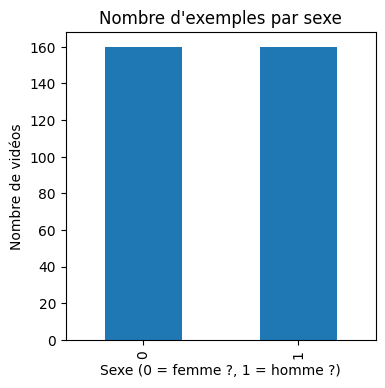

In [ ]:
import matplotlib.pyplot as plt

# Comptage par sexe
counts_sex = df["Sex"].value_counts().sort_index()
print(counts_sex)

plt.figure(figsize=(4, 4))
counts_sex.plot(kind="bar")
plt.title("Nombre d'exemples par sexe")
plt.xlabel("Sexe (0 = femme ?, 1 = homme ?)")
plt.ylabel("Nombre de vidéos")
plt.show()


In [ ]:
df_f = df[df["Sex"] == 0].copy()  # à vérifier : 0 = femme ?
df_m = df[df["Sex"] == 1].copy()  # à vérifier : 1 = homme ?

print("Taille df_f (Sex=0) :", len(df_f))
print("Taille df_m (Sex=1) :", len(df_m))


Taille df_f (Sex=0) : 160
Taille df_m (Sex=1) : 160


## Équilibre de la classe cible (Veracity) pour chaque sexe

Répartition Veracity pour Sex=0
Veracity
1    80
0    80
Name: count, dtype: int64
Proportions :
Veracity
1    0.5
0    0.5
Name: proportion, dtype: float64


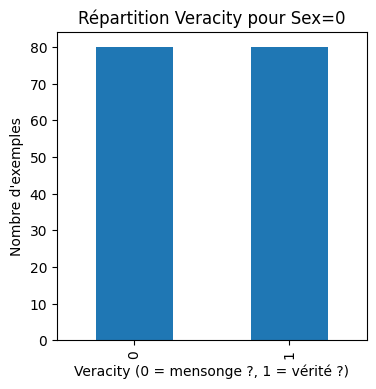

In [ ]:
print("Répartition Veracity pour Sex=0")
print(df_f["Veracity"].value_counts())
print("Proportions :")
print(df_f["Veracity"].value_counts(normalize=True))

plt.figure(figsize=(4, 4))
df_f["Veracity"].value_counts().sort_index().plot(kind="bar")
plt.title("Répartition Veracity pour Sex=0")
plt.xlabel("Veracity (0 = mensonge ?, 1 = vérité ?)")
plt.ylabel("Nombre d'exemples")
plt.show()


Répartition Veracity pour Sex=1
Veracity
1    80
0    80
Name: count, dtype: int64
Proportions :
Veracity
1    0.5
0    0.5
Name: proportion, dtype: float64


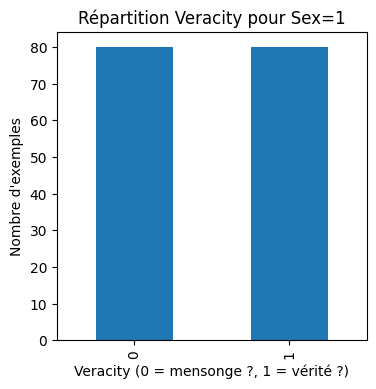

In [ ]:
print("Répartition Veracity pour Sex=1")
print(df_m["Veracity"].value_counts())
print("Proportions :")
print(df_m["Veracity"].value_counts(normalize=True))

plt.figure(figsize=(4, 4))
df_m["Veracity"].value_counts().sort_index().plot(kind="bar")
plt.title("Répartition Veracity pour Sex=1")
plt.xlabel("Veracity (0 = mensonge ?, 1 = vérité ?)")
plt.ylabel("Nombre d'exemples")
plt.show()


In [ ]:
# Veracity : 1 = vérité, 0 = mensonge
# On définit label : 1 = mensonge, 0 = vérité
df["label"] = df["Veracity"].apply(lambda v: 1 - int(v))

df_f = df[df["Sex"] == 0].copy()
df_m = df[df["Sex"] == 1].copy()

print("Répartition label pour Sex=0")
print(df_f["label"].value_counts(normalize=True))

print("Répartition label pour Sex=1")
print(df_m["label"].value_counts(normalize=True))


Répartition label pour Sex=0
label
0    0.5
1    0.5
Name: proportion, dtype: float64
Répartition label pour Sex=1
label
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

def split_df(d):
    texts = d["Transcription"].values
    labels = d["label"].values
    audio_paths = d["audio_path"].values

    # 1) train+val vs test (15% test)
    X_temp_text, X_test_text, y_temp, y_test, X_temp_audio, X_test_audio = train_test_split(
        texts,
        labels,
        audio_paths,
        test_size=0.15,
        random_state=42,
        stratify=labels
    )

    # 2) train vs val (15% val sur total)
    X_train_text, X_val_text, y_train, y_val, X_train_audio, X_val_audio = train_test_split(
        X_temp_text,
        y_temp,
        X_temp_audio,
        test_size=0.1765,  # ≈ 0.1765 * 0.85 ≈ 0.15
        random_state=42,
        stratify=y_temp
    )

    return (X_train_text, X_val_text, X_test_text,
            X_train_audio, X_val_audio, X_test_audio,
            y_train, y_val, y_test)


In [ ]:
# Global
splits_all = split_df(df)

# Femmes
splits_f = split_df(df_f)

# Hommes
splits_m = split_df(df_m)


In [ ]:
import torch
import soundfile as sf
import numpy as np
from tqdm import tqdm
from transformers import Wav2Vec2Processor, Wav2Vec2Model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
wav2vec = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h").to(device)
wav2vec.eval()

def extract_wav2vec_embedding(path):
    speech, sr = sf.read(path)
    if speech.ndim > 1:
        speech = np.mean(speech, axis=1)
    if sr != 16000:
        import librosa
        speech = librosa.resample(speech, orig_sr=sr, target_sr=16000)
        sr = 16000

    inputs = processor(speech, sampling_rate=sr, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = wav2vec(**inputs)
    emb = outputs.last_hidden_state.mean(dim=1).squeeze(0)  # (768,)
    return emb.cpu().numpy()

def build_audio_embeddings(paths_array):
    embs = []
    for p in tqdm(paths_array):
        if isinstance(p, float) and np.isnan(p):
            emb = np.zeros(768, dtype=np.float32)
        else:
            emb = extract_wav2vec_embedding(p)
        embs.append(emb)
    return np.stack(embs).astype(np.float32)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# (X_train_text, X_val_text, X_test_text,
#  X_train_audio, X_val_audio, X_test_audio,
#  y_train, y_val, y_test) = splits_all

# X_train_audio_emb = build_audio_embeddings(X_train_audio)
# X_val_audio_emb   = build_audio_embeddings(X_val_audio)
# X_test_audio_emb  = build_audio_embeddings(X_test_audio)


In [ ]:
# Femmes
(X_train_text_f, X_val_text_f, X_test_text_f,
 X_train_audio_f, X_val_audio_f, X_test_audio_f,
 y_train_f, y_val_f, y_test_f) = splits_f

X_train_audio_emb_f = build_audio_embeddings(X_train_audio_f)
X_val_audio_emb_f   = build_audio_embeddings(X_val_audio_f)
X_test_audio_emb_f  = build_audio_embeddings(X_test_audio_f)



100%|██████████| 24/24 [03:43<00:00,  9.30s/it]


In [ ]:
# Hommes
(X_train_text_m, X_val_text_m, X_test_text_m,
 X_train_audio_m, X_val_audio_m, X_test_audio_m,
 y_train_m, y_val_m, y_test_m) = splits_m

X_train_audio_emb_m = build_audio_embeddings(X_train_audio_m)
X_val_audio_emb_m   = build_audio_embeddings(X_val_audio_m)
X_test_audio_emb_m  = build_audio_embeddings(X_test_audio_m)

100%|██████████| 24/24 [03:34<00:00,  8.95s/it]


In [ ]:
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer

text_model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(text_model_name)

class TextAudioDataset(Dataset):
    def __init__(self, texts, audio_embs, labels, tokenizer, max_len=128):
        self.texts = list(texts)
        self.audio_embs = audio_embs
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        audio_vec = self.audio_embs[idx]
        label = self.labels[idx]

        enc = self.tokenizer(
            text,
            padding="max_length",
            truncation=True,
            max_length=self.max_len,
            return_tensors="pt"
        )

        return {
            "input_ids": enc["input_ids"].squeeze(0),
            "attention_mask": enc["attention_mask"].squeeze(0),
            "audio_feats": torch.tensor(audio_vec, dtype=torch.float32),
            "labels": torch.tensor(label, dtype=torch.long),
        }


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# train_dataset_all = TextAudioDataset(X_train_text_all, X_train_audio_emb_all, y_train_all, tokenizer)
# val_dataset_all   = TextAudioDataset(X_val_text_all,   X_val_audio_emb_all,   y_val_all,   tokenizer)
# test_dataset_all  = TextAudioDataset(X_test_text_all,  X_test_audio_emb_all,  y_test_all,  tokenizer)

# train_loader_all = DataLoader(train_dataset_all, batch_size=8, shuffle=True)
# val_loader_all   = DataLoader(val_dataset_all,   batch_size=8, shuffle=False)
# test_loader_all  = DataLoader(test_dataset_all,  batch_size=8, shuffle=False)


In [ ]:
# ====== FEMMES (Sex = 0) ======
train_dataset_f = TextAudioDataset(
    X_train_text_f, X_train_audio_emb_f, y_train_f, tokenizer
)
val_dataset_f = TextAudioDataset(
    X_val_text_f, X_val_audio_emb_f, y_val_f, tokenizer
)
test_dataset_f = TextAudioDataset(
    X_test_text_f, X_test_audio_emb_f, y_test_f, tokenizer
)

train_loader_f = DataLoader(train_dataset_f, batch_size=8, shuffle=True)
val_loader_f   = DataLoader(val_dataset_f,   batch_size=8, shuffle=False)
test_loader_f  = DataLoader(test_dataset_f,  batch_size=8, shuffle=False)


# ====== HOMMES (Sex = 1) ======
train_dataset_m = TextAudioDataset(
    X_train_text_m, X_train_audio_emb_m, y_train_m, tokenizer
)
val_dataset_m = TextAudioDataset(
    X_val_text_m, X_val_audio_emb_m, y_val_m, tokenizer
)
test_dataset_m = TextAudioDataset(
    X_test_text_m, X_test_audio_emb_m, y_test_m, tokenizer
)

train_loader_m = DataLoader(train_dataset_m, batch_size=8, shuffle=True)
val_loader_m   = DataLoader(val_dataset_m,   batch_size=8, shuffle=False)
test_loader_m  = DataLoader(test_dataset_m,  batch_size=8, shuffle=False)

In [ ]:
import torch.nn as nn
from transformers import AutoModel
from sklearn.utils.class_weight import compute_class_weight

# pip install pour LoRA
!pip install peft > /dev/null

from peft import LoraConfig, get_peft_model

class MultiModalBertWav2Vec(nn.Module):
    def __init__(self, text_model_name, audio_dim=768, num_labels=2,
                 class_weights=None, use_lora=True, freeze_bert=False):
        super().__init__()

        base_encoder = AutoModel.from_pretrained(text_model_name)

        if use_lora:
            lora_config = LoraConfig(
                r=8,
                lora_alpha=16,
                lora_dropout=0.1,
                bias="none",
                target_modules=["q_lin", "v_lin"]  # adapté à DistilBERT
            )
            self.text_encoder = get_peft_model(base_encoder, lora_config)
        else:
            self.text_encoder = base_encoder

        hidden_text = self.text_encoder.config.hidden_size  # 768

        self.text_proj = nn.Linear(hidden_text, 256)
        self.audio_proj = nn.Linear(audio_dim, 256)

        self.classifier = nn.Sequential(
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_labels)
        )

        if freeze_bert:
            for p in self.text_encoder.parameters():
                p.requires_grad = False

        if class_weights is not None:
            self.loss_fn = nn.CrossEntropyLoss(weight=class_weights)
        else:
            self.loss_fn = nn.CrossEntropyLoss()

    def forward(self, input_ids, attention_mask, audio_feats, labels=None):
        outputs = self.text_encoder(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        cls_emb = outputs.last_hidden_state[:, 0, :]  # (B, 768)

        text_h = self.text_proj(cls_emb)
        audio_h = self.audio_proj(audio_feats)

        fusion = torch.cat([text_h, audio_h], dim=1)
        logits = self.classifier(fusion)

        loss = None
        if labels is not None:
            loss = self.loss_fn(logits, labels)

        return {"loss": loss, "logits": logits}


In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
def evaluate(model, loader):
    model.eval()
    all_preds, all_labels = [], []
    total_loss = 0.0

    with torch.no_grad():
        for batch in loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(
                input_ids=batch["input_ids"],
                attention_mask=batch["attention_mask"],
                audio_feats=batch["audio_feats"],
                labels=batch["labels"]
            )
            loss = outputs["loss"]
            logits = outputs["logits"]

            preds = logits.argmax(dim=1).cpu().numpy()
            labels = batch["labels"].cpu().numpy()

            all_preds.extend(preds)
            all_labels.extend(labels)
            total_loss += loss.item()

    avg_loss = total_loss / len(loader)
    acc = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(
        all_labels, all_preds, average=None, labels=[0, 1]
    )
    return avg_loss, acc, precision, recall, f1

In [ ]:
# ====== MODELE FEMMES (Sex = 0) ======
classes = np.array([0, 1])
cw_f = compute_class_weight(class_weight="balanced", classes=classes, y=y_train_f)
class_weights_f = torch.tensor(cw_f, dtype=torch.float32).to(device)

model_f = MultiModalBertWav2Vec(
    text_model_name=text_model_name,
    audio_dim=X_train_audio_emb_f.shape[1],
    num_labels=2,
    class_weights=class_weights_f,
    use_lora=True,
    freeze_bert=False
).to(device)

optimizer_f = torch.optim.AdamW(model_f.parameters(), lr=2e-5)
num_epochs = 2
patience = 3
best_val_f1_f = 0.0
epochs_no_improve_f = 0
best_state_f = None

for epoch in range(num_epochs):
    model_f.train()
    total_train_loss = 0.0

    for batch in train_loader_f:
        batch = {k: v.to(device) for k, v in batch.items()}
        optimizer_f.zero_grad()
        outputs = model_f(
            input_ids=batch["input_ids"],
            attention_mask=batch["attention_mask"],
            audio_feats=batch["audio_feats"],
            labels=batch["labels"]
        )
        loss = outputs["loss"]
        loss.backward()
        optimizer_f.step()
        total_train_loss += loss.item()

    train_loss = total_train_loss / len(train_loader_f)
    val_loss, val_acc, val_prec, val_rec, val_f1 = evaluate(model_f, val_loader_f)
    f1_mensonge = val_f1[1]

    print(f"[FEMMES] Epoch {epoch+1} | Train {train_loss:.3f} | "
          f"Val {val_loss:.3f} | Val Acc {val_acc:.3f} | F1 mensonge {f1_mensonge:.3f}")

    if f1_mensonge > best_val_f1_f:
        best_val_f1_f = f1_mensonge
        best_state_f = model_f.state_dict()
        epochs_no_improve_f = 0
    else:
        epochs_no_improve_f += 1
        if epochs_no_improve_f >= patience:
            print("[FEMMES] Early stopping.")
            break

if best_state_f is not None:
    model_f.load_state_dict(best_state_f)
    print(f"[FEMMES] Meilleur F1 mensonge val = {best_val_f1_f:.3f}")


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[FEMMES] Epoch 1 | Train 0.692 | Val 0.694 | Val Acc 0.480 | F1 mensonge 0.649
[FEMMES] Epoch 2 | Train 0.695 | Val 0.694 | Val Acc 0.440 | F1 mensonge 0.611
[FEMMES] Meilleur F1 mensonge val = 0.649


In [ ]:
# ====== MODELE HOMMES (Sex = 1) ======
cw_m = compute_class_weight(class_weight="balanced", classes=classes, y=y_train_m)
class_weights_m = torch.tensor(cw_m, dtype=torch.float32).to(device)

model_m = MultiModalBertWav2Vec(
    text_model_name=text_model_name,
    audio_dim=X_train_audio_emb_m.shape[1],
    num_labels=2,
    class_weights=class_weights_m,
    use_lora=True,
    freeze_bert=False
).to(device)

optimizer_m = torch.optim.AdamW(model_m.parameters(), lr=2e-5)
best_val_f1_m = 0.0
epochs_no_improve_m = 0
best_state_m = None

for epoch in range(num_epochs):
    model_m.train()
    total_train_loss = 0.0

    for batch in train_loader_m:
        batch = {k: v.to(device) for k, v in batch.items()}
        optimizer_m.zero_grad()
        outputs = model_m(
            input_ids=batch["input_ids"],
            attention_mask=batch["attention_mask"],
            audio_feats=batch["audio_feats"],
            labels=batch["labels"]
        )
        loss = outputs["loss"]
        loss.backward()
        optimizer_m.step()
        total_train_loss += loss.item()

    train_loss = total_train_loss / len(train_loader_m)
    val_loss, val_acc, val_prec, val_rec, val_f1 = evaluate(model_m, val_loader_m)
    f1_mensonge = val_f1[1]

    print(f"[HOMMES] Epoch {epoch+1} | Train {train_loss:.3f} | "
          f"Val {val_loss:.3f} | Val Acc {val_acc:.3f} | F1 mensonge {f1_mensonge:.3f}")

    if f1_mensonge > best_val_f1_m:
        best_val_f1_m = f1_mensonge
        best_state_m = model_m.state_dict()
        epochs_no_improve_m = 0
    else:
        epochs_no_improve_m += 1
        if epochs_no_improve_m >= patience:
            print("[HOMMES] Early stopping.")
            break

if best_state_m is not None:
    model_m.load_state_dict(best_state_m)
    print(f"[HOMMES] Meilleur F1 mensonge val = {best_val_f1_m:.3f}")


[HOMMES] Epoch 1 | Train 0.694 | Val 0.690 | Val Acc 0.600 | F1 mensonge 0.286
[HOMMES] Epoch 2 | Train 0.694 | Val 0.689 | Val Acc 0.520 | F1 mensonge 0.000
[HOMMES] Meilleur F1 mensonge val = 0.286


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# classes = np.array([0, 1])
# cw_all = compute_class_weight(class_weight="balanced", classes=classes, y=y_train_all)
# class_weights_all = torch.tensor(cw_all, dtype=torch.float32).to(device)

# model_all = MultiModalBertWav2Vec(
#     text_model_name=text_model_name,
#     audio_dim=X_train_audio_emb_all.shape[1],
#     num_labels=2,
#     class_weights=class_weights_all,
#     use_lora=True,        # LoRA activé
#     freeze_bert=False
# ).to(device)

# optimizer = torch.optim.AdamW(model_all.parameters(), lr=2e-5)
# num_epochs = 10
# patience = 3
# best_val_f1 = 0.0
# epochs_no_improve = 0
# best_state = None

# def evaluate(model, loader):
#     model.eval()
#     all_preds, all_labels = [], []
#     total_loss = 0.0

#     with torch.no_grad():
#         for batch in loader:
#             batch = {k: v.to(device) for k, v in batch.items()}
#             outputs = model(
#                 input_ids=batch["input_ids"],
#                 attention_mask=batch["attention_mask"],
#                 audio_feats=batch["audio_feats"],
#                 labels=batch["labels"]
#             )
#             loss = outputs["loss"]
#             logits = outputs["logits"]

#             preds = logits.argmax(dim=1).cpu().numpy()
#             labels = batch["labels"].cpu().numpy()

#             all_preds.extend(preds)
#             all_labels.extend(labels)
#             total_loss += loss.item()

#     avg_loss = total_loss / len(loader)
#     acc = accuracy_score(all_labels, all_preds)
#     precision, recall, f1, _ = precision_recall_fscore_support(
#         all_labels, all_preds, average=None, labels=[0, 1]
#     )
#     return avg_loss, acc, precision, recall, f1

# for epoch in range(num_epochs):
#     model_all.train()
#     total_train_loss = 0.0

#     for batch in train_loader_all:
#         batch = {k: v.to(device) for k, v in batch.items()}
#         optimizer.zero_grad()
#         outputs = model_all(
#             input_ids=batch["input_ids"],
#             attention_mask=batch["attention_mask"],
#             audio_feats=batch["audio_feats"],
#             labels=batch["labels"]
#         )
#         loss = outputs["loss"]
#         loss.backward()
#         optimizer.step()
#         total_train_loss += loss.item()

#     train_loss = total_train_loss / len(train_loader_all)
#     val_loss, val_acc, val_prec, val_rec, val_f1 = evaluate(model_all, val_loader_all)
#     f1_mensonge = val_f1[1]

#     print(f"Epoch {epoch+1} | Train {train_loss:.3f} | Val {val_loss:.3f} | "
#           f"Val Acc {val_acc:.3f} | F1 mensonge {f1_mensonge:.3f}")

#     if f1_mensonge > best_val_f1:
#         best_val_f1 = f1_mensonge
#         best_state = model_all.state_dict()
#         epochs_no_improve = 0
#     else:
#         epochs_no_improve += 1
#         if epochs_no_improve >= patience:
#             print("Early stopping.")
#             break

# if best_state is not None:
#     model_all.load_state_dict(best_state)


In [ ]:
import numpy as np
import torch

def get_preds_and_labels(model, loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(
                input_ids=batch["input_ids"],
                attention_mask=batch["attention_mask"],
                audio_feats=batch["audio_feats"],
                labels=batch["labels"]
            )
            logits = outputs["logits"]
            preds = logits.argmax(dim=1).cpu().numpy()
            labels = batch["labels"].cpu().numpy()

            all_preds.extend(preds)
            all_labels.extend(labels)

    return np.array(all_preds), np.array(all_labels)


In [ ]:
y_pred_f, y_true_f = get_preds_and_labels(model_f, test_loader_f, device)
y_pred_m, y_true_m = get_preds_and_labels(model_m, test_loader_m, device)


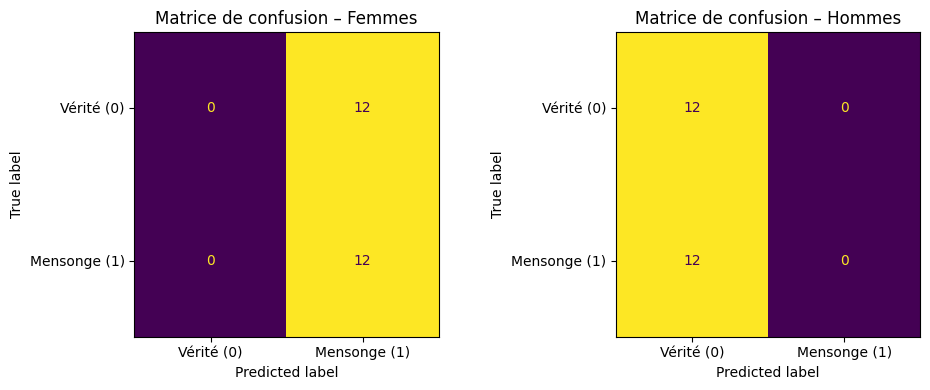

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels_names = ["Vérité (0)", "Mensonge (1)"]

cm_f = confusion_matrix(y_true_f, y_pred_f, labels=[0, 1])
cm_m = confusion_matrix(y_true_m, y_pred_m, labels=[0, 1])

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

disp_f = ConfusionMatrixDisplay(confusion_matrix=cm_f, display_labels=labels_names)
disp_f.plot(ax=axes[0], values_format="d", colorbar=False)
axes[0].set_title("Matrice de confusion – Femmes")

disp_m = ConfusionMatrixDisplay(confusion_matrix=cm_m, display_labels=labels_names)
disp_m.plot(ax=axes[1], values_format="d", colorbar=False)
axes[1].set_title("Matrice de confusion – Hommes")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print("=== Femmes (Sex = 0) ===")
print(classification_report(y_true_f, y_pred_f, target_names=["Vérité", "Mensonge"]))

print("\n=== Hommes (Sex = 1) ===")
print(classification_report(y_true_m, y_pred_m, target_names=["Vérité", "Mensonge"]))


=== Femmes (Sex = 0) ===
              precision    recall  f1-score   support

      Vérité       0.00      0.00      0.00        12
    Mensonge       0.50      1.00      0.67        12

    accuracy                           0.50        24
   macro avg       0.25      0.50      0.33        24
weighted avg       0.25      0.50      0.33        24


=== Hommes (Sex = 1) ===
              precision    recall  f1-score   support

      Vérité       0.50      1.00      0.67        12
    Mensonge       0.00      0.00      0.00        12

    accuracy                           0.50        24
   macro avg       0.25      0.50      0.33        24
weighted avg       0.25      0.50      0.33        24



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m